In [24]:
import pandas as pd
excel_path = "C:\\Users\\andre\\OneDrive\\Documentos\\bootcamp analisis de datos\\analisis de datos\\proyecto_analisis_de_datos.py\\base_anuario_de_siniestralidad_2024_Final.xlsx"
archivo_excel = pd.ExcelFile(excel_path)

# Ver las hojas disponibles
print("Hojas disponibles en el archivo:")
print(archivo_excel.sheet_names)

Hojas disponibles en el archivo:
['Siniestros', 'Vehiculos', 'Actor_vial', 'Limpieza de datos', 'Diccionario']


In [25]:
#cargar la hoja 'Siniestros' es mi hoja de interes segun el analisis previo y la asignacion de tareas
df_siniestros = pd.read_excel(excel_path, sheet_name='Siniestros')
df_siniestros.head()

,Codigo_Accidente,Formulario,Longitud,Latitud,Direccion,Fecha_Acc,AA_Acc,MM_Acc,DD_Mes_Acc,Dia_Semana_Acc,...,Con_Sitp,Con_Troncal,Con_Alimentador,Con_Zonal,Con_Provisional,Con_Articulado,Con_Biarticulado,Con_Padron_Dual,Con_Servicio_Especial,Con_Taxi
0,4404210,A685,-74.181387,4.621978,AV AVENIDA CIUDAD DE CALI-KR 55 S 02,2015-02-09,2015,Febrero,9,lunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4404211,A666,-74.027304,4.762901,AK 7-CL 186 02,2015-02-06,2015,Febrero,6,viernes,...,SI,NaN,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN
2,4404212,A698,-74.053529,4.706939,KR 45-CL 127 02,2015-02-07,2015,Febrero,7,sábado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4404213,A000042495,-74.099563,4.576256,KR 12-CL 24 S 06,2015-02-09,2015,Febrero,9,lunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4404214,A644,-74.091667,4.524080,CL 70-KR 11D SE 04,2015-02-08,2015,Febrero,8,domingo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#verificar las filas y columnas disponibles
df_siniestros.shape

(278614, 40)

In [27]:
# definir nuestras columnas de interes, para posterormente segmentar la data y tomar los registros pertenecientes a 2020 a 2024
print("Columnas disponibles:")
for i, col in enumerate(df_siniestros.columns, 1):
    print(f"{i}. {col}")

Columnas disponibles:
1. Codigo_Accidente
2. Formulario
3. Longitud
4. Latitud
5. Direccion
6. Fecha_Acc
7. AA_Acc
8. MM_Acc
9. DD_Mes_Acc
10. Dia_Semana_Acc
11. Hora_Acc
12. Min_Acc
13. Localidad
14. Clase_Acc
15. Elemento_Choque
16. Tipo_Objeto_Fijo
17. Gravedad_Indicador_Tradicional
18. Gravedad_indicador_30d
19. Con_Bicicleta
20. Con_Carga
21. Con_Embriaguez
22. Con_Huecos
23. Con_Menores
24. Con_Moto
25. Con_Peaton
26. Con_Persona_Mayor
27. Con_Rutas
28. Con_Tpi
29. Con_Tpp
30. Con_Velocidad
31. Con_Sitp
32. Con_Troncal
33. Con_Alimentador
34. Con_Zonal
35. Con_Provisional
36. Con_Articulado
37. Con_Biarticulado
38. Con_Padron_Dual
39. Con_Servicio_Especial
40. Con_Taxi


In [28]:
#renombrar columna "AA_Acc" a "Año_Accidente" verificamos que el cambio se haya realizado correctamente
df_siniestros = df_siniestros.rename(columns={"AA_Acc": "Año_Accidente"})
print("Columnas disponibles:")
for i, col in enumerate(df_siniestros.columns, 1):
    print(f"{i}. {col}")


Columnas disponibles:
1. Codigo_Accidente
2. Formulario
3. Longitud
4. Latitud
5. Direccion
6. Fecha_Acc
7. Año_Accidente
8. MM_Acc
9. DD_Mes_Acc
10. Dia_Semana_Acc
11. Hora_Acc
12. Min_Acc
13. Localidad
14. Clase_Acc
15. Elemento_Choque
16. Tipo_Objeto_Fijo
17. Gravedad_Indicador_Tradicional
18. Gravedad_indicador_30d
19. Con_Bicicleta
20. Con_Carga
21. Con_Embriaguez
22. Con_Huecos
23. Con_Menores
24. Con_Moto
25. Con_Peaton
26. Con_Persona_Mayor
27. Con_Rutas
28. Con_Tpi
29. Con_Tpp
30. Con_Velocidad
31. Con_Sitp
32. Con_Troncal
33. Con_Alimentador
34. Con_Zonal
35. Con_Provisional
36. Con_Articulado
37. Con_Biarticulado
38. Con_Padron_Dual
39. Con_Servicio_Especial
40. Con_Taxi


In [29]:
#segmentamos la data para tomar los registros pertenecientes a 2020 a 2024
df_siniestros = df_siniestros[df_siniestros['Año_Accidente'].isin([2020, 2021, 2022, 2023, 2024])]
df_siniestros.shape

(105094, 40)

In [30]:
for col in df_siniestros.columns:
    print(col)

Codigo_Accidente
Formulario
Longitud
Latitud
Direccion
Fecha_Acc
Año_Accidente
MM_Acc
DD_Mes_Acc
Dia_Semana_Acc
Hora_Acc
Min_Acc
Localidad
Clase_Acc
Elemento_Choque
Tipo_Objeto_Fijo
Gravedad_Indicador_Tradicional
Gravedad_indicador_30d
Con_Bicicleta
Con_Carga
Con_Embriaguez
Con_Huecos
Con_Menores
Con_Moto
Con_Peaton
Con_Persona_Mayor
Con_Rutas
Con_Tpi
Con_Tpp
Con_Velocidad
Con_Sitp
Con_Troncal
Con_Alimentador
Con_Zonal
Con_Provisional
Con_Articulado
Con_Biarticulado
Con_Padron_Dual
Con_Servicio_Especial
Con_Taxi


In [31]:
# Identificar columnas que contienen "con_"
cols_a_eliminar = [col for col in df_siniestros.columns if "con_" in col.lower()]

print("Columnas eliminadas:")
print(cols_a_eliminar)

# Eliminar las columnas
df_siniestros = df_siniestros.drop(columns=cols_a_eliminar)

# Confirmar columnas restantes
print("\nColumnas restantes en el DataFrame:")
print(df_siniestros.columns.tolist())

Columnas eliminadas:
['Con_Bicicleta', 'Con_Carga', 'Con_Embriaguez', 'Con_Huecos', 'Con_Menores', 'Con_Moto', 'Con_Peaton', 'Con_Persona_Mayor', 'Con_Rutas', 'Con_Tpi', 'Con_Tpp', 'Con_Velocidad', 'Con_Sitp', 'Con_Troncal', 'Con_Alimentador', 'Con_Zonal', 'Con_Provisional', 'Con_Articulado', 'Con_Biarticulado', 'Con_Padron_Dual', 'Con_Servicio_Especial', 'Con_Taxi']

Columnas restantes en el DataFrame:
['Codigo_Accidente', 'Formulario', 'Longitud', 'Latitud', 'Direccion', 'Fecha_Acc', 'Año_Accidente', 'MM_Acc', 'DD_Mes_Acc', 'Dia_Semana_Acc', 'Hora_Acc', 'Min_Acc', 'Localidad', 'Clase_Acc', 'Elemento_Choque', 'Tipo_Objeto_Fijo', 'Gravedad_Indicador_Tradicional', 'Gravedad_indicador_30d']


In [32]:
# Verificar columnas restantes
for col in df_siniestros.columns:
    print(col)

Codigo_Accidente
Formulario
Longitud
Latitud
Direccion
Fecha_Acc
Año_Accidente
MM_Acc
DD_Mes_Acc
Dia_Semana_Acc
Hora_Acc
Min_Acc
Localidad
Clase_Acc
Elemento_Choque
Tipo_Objeto_Fijo
Gravedad_Indicador_Tradicional
Gravedad_indicador_30d


In [33]:
#eliminar columnas irrelevantes que no sirven para el analisis y verificamos que se hayan eliminado correctamente

df_siniestros = df_siniestros.drop(columns=['Formulario'])

# Verificar resultado
df_siniestros.head()

,Codigo_Accidente,Longitud,Latitud,Direccion,Fecha_Acc,Año_Accidente,MM_Acc,DD_Mes_Acc,Dia_Semana_Acc,Hora_Acc,Min_Acc,Localidad,Clase_Acc,Elemento_Choque,Tipo_Objeto_Fijo,Gravedad_Indicador_Tradicional,Gravedad_indicador_30d
169947,10509738,-74.125084,4.672291,KR 86-CL 24 02,2020-01-31,2020,Enero,31,viernes,10,41,FONTIBÓN,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169948,10509739,-74.051785,4.732306,CL 150-KR 48 12,2020-01-31,2020,Enero,31,viernes,21,23,SUBA,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169949,10509740,-74.125649,4.672324,CL 24-KR 86 02,2020-01-31,2020,Enero,31,viernes,10,20,FONTIBÓN,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169950,10509741,-74.135092,4.542815,AV AVENIDA BOYACA-CL 15D S 02,2020-01-31,2020,Enero,31,viernes,12,18,CIUDAD BOLÍVAR,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169951,10509742,-74.100031,4.561922,KR 4B-CL 36 S 53,2020-01-31,2020,Enero,31,viernes,1,12,SAN CRISTÓBAL,Choque,Objeto Fijo,VEHICULO,Solo Daños,Solo Daños


In [34]:
# renombramiento de columnas para un mejor entendimiento de las mismas, validacion
df_siniestros = df_siniestros.rename(columns={
    "Fecha_Acc": "Fecha_Accidente",
    "MM_Acc": "Mes_Accidente",
    "DD_Acc": "Día_Accidente",
    "DD_Mes_Acc": "Día_Accidente",
    "Dia_Semana_Acc": "Día_Semana_Accidente",
    "Hora_Acc": "Hora_Accidente",
    "Min_Acc": "Minuto_Accidente",
    "Clase_Acc": "Clase_Accidente",
})
df_siniestros.head()

,Codigo_Accidente,Longitud,Latitud,Direccion,Fecha_Accidente,Año_Accidente,Mes_Accidente,Día_Accidente,Día_Semana_Accidente,Hora_Accidente,Minuto_Accidente,Localidad,Clase_Accidente,Elemento_Choque,Tipo_Objeto_Fijo,Gravedad_Indicador_Tradicional,Gravedad_indicador_30d
169947,10509738,-74.125084,4.672291,KR 86-CL 24 02,2020-01-31,2020,Enero,31,viernes,10,41,FONTIBÓN,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169948,10509739,-74.051785,4.732306,CL 150-KR 48 12,2020-01-31,2020,Enero,31,viernes,21,23,SUBA,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169949,10509740,-74.125649,4.672324,CL 24-KR 86 02,2020-01-31,2020,Enero,31,viernes,10,20,FONTIBÓN,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169950,10509741,-74.135092,4.542815,AV AVENIDA BOYACA-CL 15D S 02,2020-01-31,2020,Enero,31,viernes,12,18,CIUDAD BOLÍVAR,Choque,Vehículo,NaN,Solo Daños,Solo Daños
169951,10509742,-74.100031,4.561922,KR 4B-CL 36 S 53,2020-01-31,2020,Enero,31,viernes,1,12,SAN CRISTÓBAL,Choque,Objeto Fijo,VEHICULO,Solo Daños,Solo Daños


In [35]:
#normalizar los registros de la columna Tipo_Objeto_Fijo, validacion de cambios
df_siniestros['Tipo_Objeto_Fijo'] = df_siniestros['Tipo_Objeto_Fijo'].str.capitalize()
df_siniestros['Tipo_Objeto_Fijo'].unique()

array([nan, 'Vehiculo', 'Tren', 'Arbol', 'Semaforo', 'Objeto fijo',
       'Poste', 'Inmueble', 'Muro', 'Semoviente', 'Por identificar',
       'Baranda', 'Vehiculo estacionado', 'Valla-señal', 'Otro',
       'Tarima-caseta', 'Hidrante'], dtype=object)

In [36]:
#imputacions de datos faltantes en la columna Tipo_Objeto_Fijo con el valor "No aplica"
df_siniestros['Tipo_Objeto_Fijo'] = df_siniestros['Tipo_Objeto_Fijo'].fillna('No aplica')
df_siniestros['Tipo_Objeto_Fijo'].isnull().sum()

np.int64(0)

In [37]:
df_siniestros['Tipo_Objeto_Fijo'].unique()

array(['No aplica', 'Vehiculo', 'Tren', 'Arbol', 'Semaforo',
       'Objeto fijo', 'Poste', 'Inmueble', 'Muro', 'Semoviente',
       'Por identificar', 'Baranda', 'Vehiculo estacionado',
       'Valla-señal', 'Otro', 'Tarima-caseta', 'Hidrante'], dtype=object)

In [38]:
#imputacion de datos faltantes en la columna elemento_choque con el valor "Sin informacion"
df_siniestros['Elemento_Choque'] = df_siniestros['Elemento_Choque'].fillna('Sin informacion')
df_siniestros['Elemento_Choque'].isnull().sum()

np.int64(0)

In [39]:
df_siniestros['Elemento_Choque'].unique()

array(['Vehículo', 'Objeto Fijo', 'Sin informacion', 'Semoviente', 'Tren'],
      dtype=object)

In [40]:
#normalizar los registros de la columna Localidad, validacion de cambios
df_siniestros['Localidad'] = df_siniestros['Localidad'].str.capitalize()
df_siniestros['Localidad'].unique()

array(['Fontibón', 'Suba', 'Ciudad bolívar', 'San cristóbal', 'Bosa',
       'Kennedy', 'Usaquén', 'Chapinero', 'Engativá', 'Los mártires',
       'Barrios unidos', 'Puente aranda', 'Candelaria', 'Santa fe',
       'Teusaquillo', 'Tunjuelito', 'Antonio nariño',
       'Rafael uribe uribe', 'Usme', 'Sumapaz'], dtype=object)

In [41]:
df_siniestros.isnull().sum()

Codigo_Accidente                    0
Longitud                          288
Latitud                           288
Direccion                           0
Fecha_Accidente                     0
Año_Accidente                       0
Mes_Accidente                       0
Día_Accidente                       0
Día_Semana_Accidente                0
Hora_Accidente                      0
Minuto_Accidente                    0
Localidad                           0
Clase_Accidente                     0
Elemento_Choque                     0
Tipo_Objeto_Fijo                    0
Gravedad_Indicador_Tradicional      0
Gravedad_indicador_30d             11
dtype: int64

In [42]:
#imputacion de datos faltantes en la columna Gravedad_indicador_30 con el valor "Sin informacion"
df_siniestros['Gravedad_indicador_30d'] = df_siniestros['Gravedad_indicador_30d'].fillna('Sin informacion')
df_siniestros['Gravedad_indicador_30d'].isnull().sum()

np.int64(0)

In [53]:
df_siniestros.isnull().sum()

Codigo_Accidente                       0
Longitud                             287
Latitud                              287
Direccion                              0
Fecha_Accidente                        0
Año_Accidente                          0
Mes_Accidente                          0
Día_Accidente                          0
Día_Semana_Accidente                   0
Hora_Accidente                         0
Minuto_Accidente                       0
Localidad                              0
Clase_Accidente                        0
Elemento_Choque                        0
Tipo_Objeto_Fijo                       0
Gravedad_Indicador_Tradicional         0
Gravedad_indicador_30d                 0
direccion_normalizada                  0
estado_geocodificacion                 0
direccion_osm                     105093
dtype: int64

In [54]:
df_siniestros.head()

,Codigo_Accidente,Longitud,Latitud,Direccion,Fecha_Accidente,Año_Accidente,Mes_Accidente,Día_Accidente,Día_Semana_Accidente,Hora_Accidente,Minuto_Accidente,Localidad,Clase_Accidente,Elemento_Choque,Tipo_Objeto_Fijo,Gravedad_Indicador_Tradicional,Gravedad_indicador_30d,direccion_normalizada,estado_geocodificacion,direccion_osm
169947,10509738,-74.125084,4.672291,KR 86-CL 24 02,2020-01-31,2020,Enero,31,viernes,10,41,Fontibón,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 86 CON CALLE 24 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169948,10509739,-74.051785,4.732306,CL 150-KR 48 12,2020-01-31,2020,Enero,31,viernes,21,23,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 150 CON CARRERA 48 12, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169949,10509740,-74.125649,4.672324,CL 24-KR 86 02,2020-01-31,2020,Enero,31,viernes,10,20,Fontibón,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 24 CON CARRERA 86 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169950,10509741,-74.135092,4.542815,AV AVENIDA BOYACA-CL 15D S 02,2020-01-31,2020,Enero,31,viernes,12,18,Ciudad bolívar,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"AVENIDA BOYACA CON CALLE 15D SUR 2, BOGOTÁ, CO...",COORDENADAS_EXISTENTES,None
169951,10509742,-74.100031,4.561922,KR 4B-CL 36 S 53,2020-01-31,2020,Enero,31,viernes,1,12,San cristóbal,Choque,Objeto Fijo,Vehiculo,Solo Daños,Solo Daños,"CARRERA 4B CON CALLE 36 SUR 53, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None


In [56]:
df_siniestros.head(10)

,Codigo_Accidente,Longitud,Latitud,Direccion,Fecha_Accidente,Año_Accidente,Mes_Accidente,Día_Accidente,Día_Semana_Accidente,Hora_Accidente,Minuto_Accidente,Localidad,Clase_Accidente,Elemento_Choque,Tipo_Objeto_Fijo,Gravedad_Indicador_Tradicional,Gravedad_indicador_30d,direccion_normalizada,estado_geocodificacion,direccion_osm
169947,10509738,-74.125084,4.672291,KR 86-CL 24 02,2020-01-31,2020,Enero,31,viernes,10,41,Fontibón,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 86 CON CALLE 24 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169948,10509739,-74.051785,4.732306,CL 150-KR 48 12,2020-01-31,2020,Enero,31,viernes,21,23,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 150 CON CARRERA 48 12, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169949,10509740,-74.125649,4.672324,CL 24-KR 86 02,2020-01-31,2020,Enero,31,viernes,10,20,Fontibón,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 24 CON CARRERA 86 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169950,10509741,-74.135092,4.542815,AV AVENIDA BOYACA-CL 15D S 02,2020-01-31,2020,Enero,31,viernes,12,18,Ciudad bolívar,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"AVENIDA BOYACA CON CALLE 15D SUR 2, BOGOTÁ, CO...",COORDENADAS_EXISTENTES,None
169951,10509742,-74.100031,4.561922,KR 4B-CL 36 S 53,2020-01-31,2020,Enero,31,viernes,1,12,San cristóbal,Choque,Objeto Fijo,Vehiculo,Solo Daños,Solo Daños,"CARRERA 4B CON CALLE 36 SUR 53, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169952,10509743,-74.096272,4.757223,KR 111-CL 153 30,2020-01-31,2020,Enero,31,viernes,13,44,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 111 CON CALLE 153 30, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169953,10509744,-74.180517,4.598093,CL 65-KR 77H S 2,2020-01-31,2020,Enero,31,viernes,6,10,Bosa,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 65 CON CARRERA 77H SUR 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169954,10509745,-74.154019,4.642562,AV AVENIDA CIUDAD DE CALI-CL 6C 02,2020-01-31,2020,Enero,31,viernes,10,0,Kennedy,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"AVENIDA CIUDAD DE CALI CON CALLE 6C 2, BOGOTÁ,...",COORDENADAS_EXISTENTES,None
169955,10509746,-74.123855,4.740633,CL 130A-KR 154 2,2020-01-31,2020,Enero,31,viernes,10,58,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 130A CON CARRERA 154 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None
169956,10509747,-74.028708,4.704716,KR 7-CL 127B 02,2020-01-31,2020,Enero,31,viernes,9,0,Usaquén,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 7 CON CALLE 127B 2, BOGOTÁ, COLOMBIA",COORDENADAS_EXISTENTES,None


In [57]:
# exportar el DataFrame limpio a un archivo Excel, con el pendiente de 287 geolocalizaciones
df_siniestros.to_excel("siniestros.xlsx", index=False)

In [46]:
# normalizacion de la columna direccion para posteriormente imputar los datos faltantes con la libreria geopy y asi obtener las coordenadas de latitud y longitud de los siniestros que no cuentan con esta informacion

import pandas as pd
import re



# 2️⃣ Función de normalización corregida
def normalizar_direccion(addr):
    if pd.isna(addr):
        return None
        
    addr = str(addr).upper().strip()
    
    # PRIMERO: Manejar las abreviaturas de direcciones (S, E, N, O) que van después del número
    # Esto evita que "CL " se convierta en "CALLESTE"
    
    # Patrón para direcciones como "CL 24 E" -> "CALLE 24 ESTE"
    addr = re.sub(r'(\b(?:CL|CALLE|KR|CARRERA|TR|TRANSVERSAL|DG|DIAGONAL)\s+\d+[A-Z]*)\s+([SENO])\s', r'\1 \2 ', addr)
    
    # Ahora aplicar los reemplazos principales
    reemplazos = {
        'KR ': 'CARRERA ',
        'CRA ': 'CARRERA ',
        'CL ': 'CALLE ',
        'CLL ': 'CALLE ',
        'TR ': 'TRANSVERSAL ',
        'TV ': 'TRANSVERSAL ',
        'DG ': 'DIAGONAL ',
        'AC ': 'AVENIDA CARRERA ',
        'AV ': 'AVENIDA ',
        'AV.': 'AVENIDA ',
        'VIA ': 'CARRERA ',
        'KM ': 'KILOMETRO ',
        
        # Separadores
        '-': ' CON ',
        ' - ': ' CON ',
        '_': ' CON ',
    }
    
    # Aplicar reemplazos principales
    for key, value in reemplazos.items():
        addr = addr.replace(key, value)
    
    # LUEGO: Aplicar reemplazos de direcciones cardinales
    reemplazos_cardinales = {
        ' S ': ' SUR ',
        ' ES ': ' ESTE ',
        ' E ': ' ESTE ',
        ' N ': ' NORTE ',
        ' O ': ' OESTE ',
        ' SE ': ' SURESTE ',
        ' NE ': ' NORESTE ',
        ' SO ': ' SUROESTE ',
        ' NO ': ' NOROESTE ',
    }
    
    for key, value in reemplazos_cardinales.items():
        addr = addr.replace(key, value)
    
    # Manejar casos especiales de AVENIDA
    addr = re.sub(r'AVENIDA\s+AVENIDA', 'AVENIDA', addr)
    
    # Manejar números con letras (ej: 85-CL -> 85 CALLE)
    addr = re.sub(r'(\d+)-([A-Z])', r'\1 \2', addr)
    
    # Manejar números con BIS (ej: 4FBIS -> 4F BIS)
    addr = re.sub(r'(\d+[A-Z]?)BIS', r'\1 BIS', addr)
    
    # Manejar direcciones con formato "KR 85-CL 52"
    addr = re.sub(r'(\b[CARRERA|CALLE|TRANSVERSAL|DIAGONAL]+\s+\d+[A-Z]*)\s*-\s*(\b[CARRERA|CALLE|TRANSVERSAL|DIAGONAL]+\s+\d+[A-Z]*)', r'\1 CON \2', addr)
    
    # Normalizar números (ej: "02" -> "2")
    addr = re.sub(r'\b0(\d)\b', r'\1', addr)
    
    # Eliminar caracteres especiales
    addr = addr.replace('.', '')
    addr = addr.replace(',', '')
    
    # Quitar espacios extra
    addr = ' '.join(addr.split())
    
    # Agregar ciudad y país si no está presente
    if 'BOGOT' not in addr and 'COLOMBIA' not in addr:
        addr = addr + ', BOGOTÁ, COLOMBIA'
    
    return addr

# 3️⃣ Aplicar normalización
print("Iniciando normalización de direcciones...")
df_siniestros['direccion_normalizada'] = df_siniestros['Direccion'].apply(normalizar_direccion)

# 4️⃣ Mostrar resultados de normalización
print("✓ Normalización completada")
print(f"Total de direcciones normalizadas: {len(df_siniestros)}")
print(f"Direcciones nulas en original: {df_siniestros['Direccion'].isna().sum()}")
print(f"Direcciones nulas en normalizado: {df_siniestros['direccion_normalizada'].isna().sum()}")

# 5️⃣ Mostrar ejemplos CORREGIDOS
print("\nEjemplos de normalización CORREGIDOS:")
print("-" * 80)
ejemplos_corregidos = [
    "KR 86-CL 24 02",
    "KR 85-CL 52 S 2", 
    "KR 81-CL 1F S 64",
    "CL 047-KR 14 2",
    "AV AVENIDA DEL SUR-KR 62B 02"
]

for ejemplo in ejemplos_corregidos:
    normalizada = normalizar_direccion(ejemplo)
    print(f"Original: {ejemplo}")
    print(f"Normalizada: {normalizada}")
    print("-" * 80)

# También mostrar algunos del DataFrame
print("\nPrimeros 5 ejemplos del DataFrame:")
print("-" * 80)
for i in range(min(5, len(df_siniestros))):
    original = df_siniestros['Direccion'].iloc[i]
    normalizada = df_siniestros['direccion_normalizada'].iloc[i]
    print(f"Original: {original}")
    print(f"Normalizada: {normalizada}")
    print("-" * 80)

# 6️⃣ Guardar datos con direcciones normalizadas (OPCIONAL)
df_siniestros.to_csv("siniestros_direcciones_normalizadas.csv", index=False, encoding='utf-8')
print("\n✓ Archivo guardado: siniestros_direcciones_normalizadas.csv")

Iniciando normalización de direcciones...
✓ Normalización completada
Total de direcciones normalizadas: 105094
Direcciones nulas en original: 0
Direcciones nulas en normalizado: 0

Ejemplos de normalización CORREGIDOS:
--------------------------------------------------------------------------------
Original: KR 86-CL 24 02
Normalizada: CARRERA 86 CON CALLE 24 2, BOGOTÁ, COLOMBIA
--------------------------------------------------------------------------------
Original: KR 85-CL 52 S 2
Normalizada: CARRERA 85 CON CALLE 52 SUR 2, BOGOTÁ, COLOMBIA
--------------------------------------------------------------------------------
Original: KR 81-CL 1F S 64
Normalizada: CARRERA 81 CON CALLE 1F SUR 64, BOGOTÁ, COLOMBIA
--------------------------------------------------------------------------------
Original: CL 047-KR 14 2
Normalizada: CALLE 047 CON CARRERA 14 2, BOGOTÁ, COLOMBIA
--------------------------------------------------------------------------------
Original: AV AVENIDA DEL SUR-KR 62B

In [50]:
df_siniestros.head(10)

,Codigo_Accidente,Longitud,Latitud,Direccion,Fecha_Accidente,Año_Accidente,Mes_Accidente,Día_Accidente,Día_Semana_Accidente,Hora_Accidente,Minuto_Accidente,Localidad,Clase_Accidente,Elemento_Choque,Tipo_Objeto_Fijo,Gravedad_Indicador_Tradicional,Gravedad_indicador_30d,direccion_normalizada
169947,10509738,-74.125084,4.672291,KR 86-CL 24 02,2020-01-31,2020,Enero,31,viernes,10,41,Fontibón,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 86 CON CALLE 24 2, BOGOTÁ, COLOMBIA"
169948,10509739,-74.051785,4.732306,CL 150-KR 48 12,2020-01-31,2020,Enero,31,viernes,21,23,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 150 CON CARRERA 48 12, BOGOTÁ, COLOMBIA"
169949,10509740,-74.125649,4.672324,CL 24-KR 86 02,2020-01-31,2020,Enero,31,viernes,10,20,Fontibón,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 24 CON CARRERA 86 2, BOGOTÁ, COLOMBIA"
169950,10509741,-74.135092,4.542815,AV AVENIDA BOYACA-CL 15D S 02,2020-01-31,2020,Enero,31,viernes,12,18,Ciudad bolívar,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"AVENIDA BOYACA CON CALLE 15D SUR 2, BOGOTÁ, CO..."
169951,10509742,-74.100031,4.561922,KR 4B-CL 36 S 53,2020-01-31,2020,Enero,31,viernes,1,12,San cristóbal,Choque,Objeto Fijo,Vehiculo,Solo Daños,Solo Daños,"CARRERA 4B CON CALLE 36 SUR 53, BOGOTÁ, COLOMBIA"
169952,10509743,-74.096272,4.757223,KR 111-CL 153 30,2020-01-31,2020,Enero,31,viernes,13,44,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 111 CON CALLE 153 30, BOGOTÁ, COLOMBIA"
169953,10509744,-74.180517,4.598093,CL 65-KR 77H S 2,2020-01-31,2020,Enero,31,viernes,6,10,Bosa,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 65 CON CARRERA 77H SUR 2, BOGOTÁ, COLOMBIA"
169954,10509745,-74.154019,4.642562,AV AVENIDA CIUDAD DE CALI-CL 6C 02,2020-01-31,2020,Enero,31,viernes,10,0,Kennedy,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"AVENIDA CIUDAD DE CALI CON CALLE 6C 2, BOGOTÁ,..."
169955,10509746,-74.123855,4.740633,CL 130A-KR 154 2,2020-01-31,2020,Enero,31,viernes,10,58,Suba,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CALLE 130A CON CARRERA 154 2, BOGOTÁ, COLOMBIA"
169956,10509747,-74.028708,4.704716,KR 7-CL 127B 02,2020-01-31,2020,Enero,31,viernes,9,0,Usaquén,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,"CARRERA 7 CON CALLE 127B 2, BOGOTÁ, COLOMBIA"


In [55]:
df_siniestros.isnull().sum()

Codigo_Accidente                       0
Longitud                             287
Latitud                              287
Direccion                              0
Fecha_Accidente                        0
Año_Accidente                          0
Mes_Accidente                          0
Día_Accidente                          0
Día_Semana_Accidente                   0
Hora_Accidente                         0
Minuto_Accidente                       0
Localidad                              0
Clase_Accidente                        0
Elemento_Choque                        0
Tipo_Objeto_Fijo                       0
Gravedad_Indicador_Tradicional         0
Gravedad_indicador_30d                 0
direccion_normalizada                  0
estado_geocodificacion                 0
direccion_osm                     105093
dtype: int64

In [52]:
#imputar los datos faltantes de latitud y longitud con la libreria geopy

from geopy.geocoders import Nominatim
import time
import pandas as pd

# 1️⃣ Identificar registros con coordenadas faltantes
print("🔍 Identificando registros con coordenadas faltantes...")

# Verificar nombres exactos de las columnas
print("Columnas disponibles en el DataFrame:")
print(df_siniestros.columns.tolist())

# Asumir nombres de columnas (ajustar si es necesario)
col_lat = 'Latitud'
col_lon = 'Longitud'

# Crear máscara de registros nulos
mascara_nulos = df_siniestros[col_lat].isna() | df_siniestros[col_lon].isna()
registros_nulos = df_siniestros[mascara_nulos].copy()

print(f"\n📊 ESTADÍSTICAS INICIALES:")
print(f"Total de registros: {len(df_siniestros):,}")
print(f"Registros CON coordenadas: {len(df_siniestros) - len(registros_nulos):,}")
print(f"Registros SIN coordenadas (a geocodificar): {len(registros_nulos):,}")

if len(registros_nulos) == 0:
    print("✅ No hay registros con coordenadas nulas. No es necesaria la geocodificación.")
else:
    # 2️⃣ Configurar geocodificador
    geolocator = Nominatim(user_agent="bogota_siniestros_geocoder_v1")
    
    def geocodificar_direccion(direccion, delay=1.5):
        """
        Geocodificar una dirección usando el método directo de geopy
        """
        if pd.isna(direccion):
            return None, None, "DIRECCION_NULA", None
        
        try:
            time.sleep(delay)  # Respetar rate limiting
            
            # Usar el método directo como en el ejemplo
            location = geolocator.geocode(direccion, exactly_one=True, timeout=15)
            
            if location:
                # Extraer información como en el ejemplo
                address = location.address
                latitude = location.latitude
                longitude = location.longitude
                
                print(f"✅ ENCONTRADO: {direccion[:60]}...")
                print(f"   📍 Coordenadas: ({latitude}, {longitude})")
                print(f"   🏠 Dirección OSM: {address[:80]}...")
                
                return latitude, longitude, "ENCONTRADO", address
            else:
                print(f"❌ NO ENCONTRADO: {direccion[:60]}...")
                return None, None, "NO_ENCONTRADO", None
                
        except Exception as e:
            print(f"⚠️ ERROR en {direccion[:60]}...: {str(e)}")
            return None, None, f"ERROR: {str(e)}", None

    # 3️⃣ Geocodificar SOLO los registros nulos
    print(f"\n🔄 Iniciando geocodificación de {len(registros_nulos)} direcciones...")
    print(f"⏰ Tiempo estimado: {len(registros_nulos) * 1.5 / 60:.1f} minutos")
    
    # Listas para almacenar resultados
    latitudes = []
    longitudes = []
    estados = []
    direcciones_osm = []
    
    # Contador para mostrar progreso
    contador = 0
    
    # Geocodificar cada dirección
    for idx, row in registros_nulos.iterrows():
        contador += 1
        direccion = row['direccion_normalizada']
        
        print(f"\n[{contador}/{len(registros_nulos)}] Procesando: {direccion[:70]}...")
        
        lat, lon, estado, dir_osm = geocodificar_direccion(direccion)
        
        latitudes.append(lat)
        longitudes.append(lon)
        estados.append(estado)
        direcciones_osm.append(dir_osm)

    # 4️⃣ Actualizar el DataFrame original
    print(f"\n📝 Actualizando DataFrame original...")
    
    # Agregar resultados al DataFrame de registros nulos
    registros_nulos['latitud_nueva'] = latitudes
    registros_nulos['longitud_nueva'] = longitudes
    registros_nulos['estado_geocodificacion'] = estados
    registros_nulos['direccion_osm'] = direcciones_osm
    
    # Contar resultados
    exitosos = sum(1 for x in latitudes if x is not None)
    print(f"\n📊 RESULTADOS DE LA GEOCODIFICACIÓN:")
    print(f"Total procesados: {len(registros_nulos)}")
    print(f"✅ Coordenadas encontradas: {exitosos}")
    print(f"❌ Coordenadas NO encontradas: {len(registros_nulos) - exitosos}")
    
    # 5️⃣ Actualizar SOLO los registros con coordenadas encontradas
    actualizaciones = 0
    for idx, row in registros_nulos.iterrows():
        if row['latitud_nueva'] is not None and row['longitud_nueva'] is not None:
            df_siniestros.loc[idx, col_lat] = row['latitud_nueva']
            df_siniestros.loc[idx, col_lon] = row['longitud_nueva']
            actualizaciones += 1
    
    # 6️⃣ Agregar columnas de estado y dirección OSM a todo el DataFrame
    df_siniestros['estado_geocodificacion'] = 'COORDENADAS_EXISTENTES'
    df_siniestros['direccion_osm'] = None
    
    for idx, row in registros_nulos.iterrows():
        df_siniestros.loc[idx, 'estado_geocodificacion'] = row['estado_geocodificacion']
        df_siniestros.loc[idx, 'direccion_osm'] = row['direccion_osm']
    
    print(f"\n✅ ACTUALIZACIÓN COMPLETADA:")
    print(f"Registros actualizados con nuevas coordenadas: {actualizaciones}")

# 7️⃣ ESTADÍSTICAS FINALES
print(f"\n🎯 ESTADÍSTICAS FINALES:")
print(f"Total de registros: {len(df_siniestros):,}")
print(f"Registros CON coordenadas: {df_siniestros[col_lat].notna().sum():,}")
print(f"Registros SIN coordenadas: {df_siniestros[col_lat].isna().sum():,}")

# 8️⃣ Mostrar distribución de estados
if 'estado_geocodificacion' in df_siniestros.columns:
    print(f"\n📈 DISTRIBUCIÓN DE ESTADOS:")
    print(df_siniestros['estado_geocodificacion'].value_counts())

# 9️⃣ Guardar resultados
df_siniestros.to_csv("siniestros_con_coordenadas_actualizadas.csv", index=False, encoding='utf-8')

# Guardar también un archivo solo con los que tienen coordenadas
df_con_coordenadas = df_siniestros[df_siniestros[col_lat].notna() & df_siniestros[col_lon].notna()]
df_con_coordenadas.to_csv("siniestros_solo_con_coordenadas.csv", index=False, encoding='utf-8')

print(f"\n💾 ARCHIVOS GUARDADOS:")
print(f"- siniestros_con_coordenadas_actualizadas.csv (todos los registros)")
print(f"- siniestros_solo_con_coordenadas.csv (solo registros con coordenadas)")

# 🔟 Mostrar ejemplos de actualizaciones exitosas
print(f"\n👀 EJEMPLOS DE ACTUALIZACIONES EXITOSAS:")
actualizados = df_siniestros[df_siniestros['estado_geocodificacion'] == 'ENCONTRADO']
if len(actualizados) > 0:
    for i in range(min(3, len(actualizados))):
        print(f"\n📍 Ejemplo {i+1}:")
        print(f"   Dirección original: {actualizados['Direccion'].iloc[i]}")
        print(f"   Dirección normalizada: {actualizados['direccion_normalizada'].iloc[i]}")
        print(f"   Dirección OSM: {actualizados['direccion_osm'].iloc[i]}")
        print(f"   Coordenadas: ({actualizados[col_lat].iloc[i]}, {actualizados[col_lon].iloc[i]})")
        print("-" * 80)
else:
    print("No se encontraron actualizaciones exitosas para mostrar.")

print(f"\n🎉 PROCESO COMPLETADO!")

🔍 Identificando registros con coordenadas faltantes...
Columnas disponibles en el DataFrame:
['Codigo_Accidente', 'Longitud', 'Latitud', 'Direccion', 'Fecha_Accidente', 'Año_Accidente', 'Mes_Accidente', 'Día_Accidente', 'Día_Semana_Accidente', 'Hora_Accidente', 'Minuto_Accidente', 'Localidad', 'Clase_Accidente', 'Elemento_Choque', 'Tipo_Objeto_Fijo', 'Gravedad_Indicador_Tradicional', 'Gravedad_indicador_30d', 'direccion_normalizada']

📊 ESTADÍSTICAS INICIALES:
Total de registros: 105,094
Registros CON coordenadas: 104,806
Registros SIN coordenadas (a geocodificar): 288

🔄 Iniciando geocodificación de 288 direcciones...
⏰ Tiempo estimado: 7.2 minutos

[1/288] Procesando: CARRERA 85 CON CALLE 52 SUR 2, BOGOTÁ, COLOMBIA...
❌ NO ENCONTRADO: CARRERA 85 CON CALLE 52 SUR 2, BOGOTÁ, COLOMBIA...

[2/288] Procesando: CARRERA 81 CON CALLE 1F SUR 64, BOGOTÁ, COLOMBIA...
❌ NO ENCONTRADO: CARRERA 81 CON CALLE 1F SUR 64, BOGOTÁ, COLOMBIA...

[3/288] Procesando: TRANSVERSAL 94L CON CALLE 1 2, BOGOTÁ, 

In [23]:
df_siniestros.sample(10)

,Codigo_Accidente,Longitud,Latitud,Direccion,Fecha_Accidente,Año_Accidente,Mes_Accidente,Día_Accidente,Día_Semana_Accidente,Hora_Accidente,Minuto_Accidente,Localidad,Clase_Accidente,Elemento_Choque,Tipo_Objeto_Fijo,Gravedad_Indicador_Tradicional,Gravedad_indicador_30d,Direccion_normalizada
194251,10525355,-74.031330,4.696779,KR 7-CL 120 02,2020-10-28,2020,Octubre,28,miércoles,12,27,Usaquén,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,CARRERA 7-CL 120 02
192616,10523270,-74.106671,4.671269,AV AVENIDA BOYACA-CL 53 02,2020-10-08,2020,Octubre,8,jueves,13,0,Engativá,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,AVENIDA AVENIDA BOYACA-CL 53 02
213589,10550123,-74.198679,4.629903,KR 93 D D - CL 69 S 40,2021-09-20,2021,Septiembre,20,lunes,17,40,Bosa,Choque,Vehículo,No aplica,Con Heridos,Con Heridos,CARRERA 93 D D - CL 69
180718,10512027,-74.052334,4.706670,CL 127-KR 21 02,2020-02-25,2020,Febrero,25,martes,14,5,Usaquén,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,CALLE 127-KR 21 02
198802,10531567,-74.094825,4.688890,CL 73 - KR 72 BIS 02,2021-01-05,2021,Enero,5,martes,18,10,Engativá,Choque,Vehículo,No aplica,Con Heridos,Con Heridos,CALLE 73 - KR 72 02
267145,10573752,-74.094000,4.710000,CL 90 - KR 85 02,2022-06-14,2022,Junio,14,martes,12,0,Engativá,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,CALLE 90 - KR 85 02
169983,10510137,-74.168948,4.595838,AV AVENIDA DEL SUR-KR 73I 55,2020-02-04,2020,Febrero,4,martes,8,10,Bosa,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,AVENIDA AVENIDA DEL SUR-KR 73I 55
272962,10589479,-74.144560,4.590221,DG 51 S- KR 55 A 02,2023-03-31,2023,Marzo,31,viernes,0,10,Tunjuelito,Atropello,Sin informacion,No aplica,Con Heridos,Con Heridos,DIAGONAL 51 S- KR 55 A 02
270420,10603520,-74.125443,4.564051,CL 51 S- KR 13 A 02,2024-03-26,2024,Marzo,26,martes,23,4,Tunjuelito,Choque,Vehículo,No aplica,Con Heridos,Con Heridos,CALLE 51 S- KR 13 A 02
170235,10507766,-74.031957,4.743037,KR 9-CL 165 10,2020-01-08,2020,Enero,8,miércoles,23,26,Usaquén,Choque,Vehículo,No aplica,Solo Daños,Solo Daños,CARRERA 9-CL 165 10


#Analisis Grafico para los insights mas relevantes

INICIANDO ANÁLISIS DE SINIESTROS
ANÁLISIS TEMPORAL DE SINIESTROS


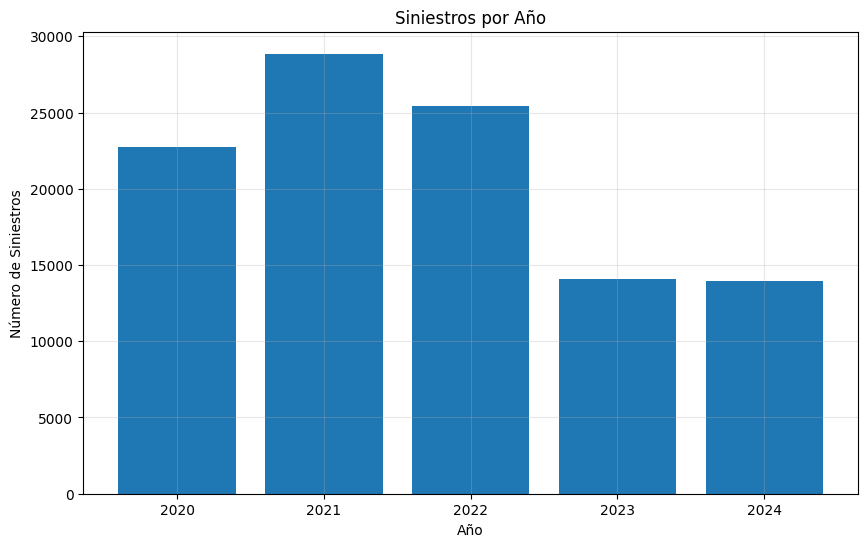

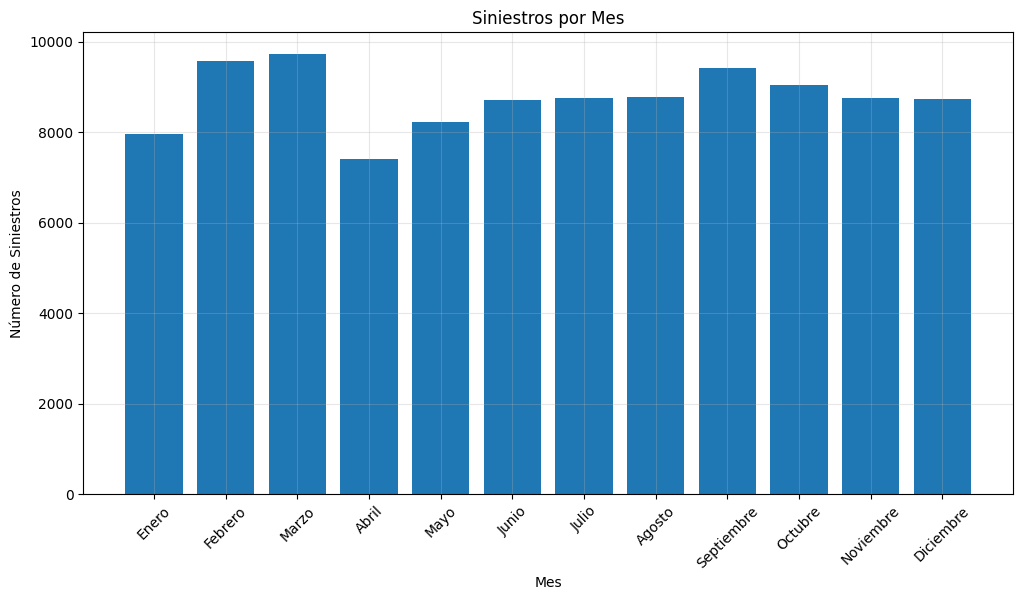

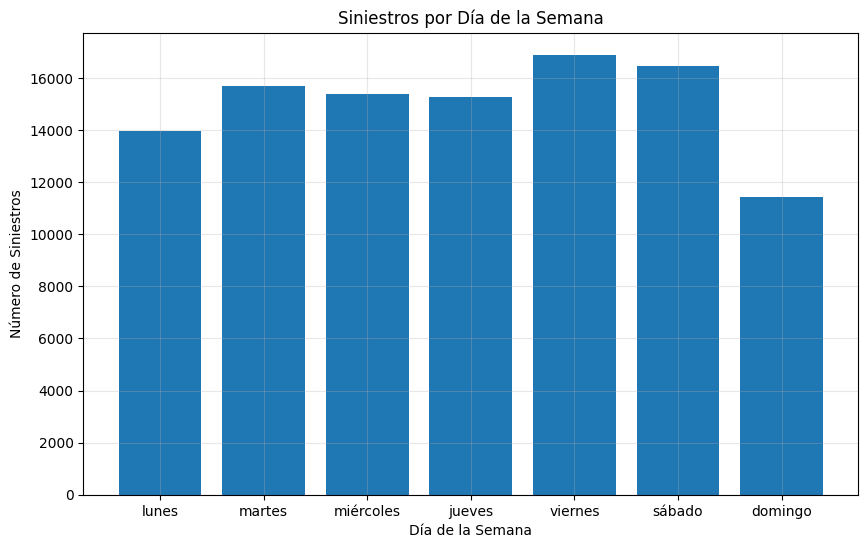

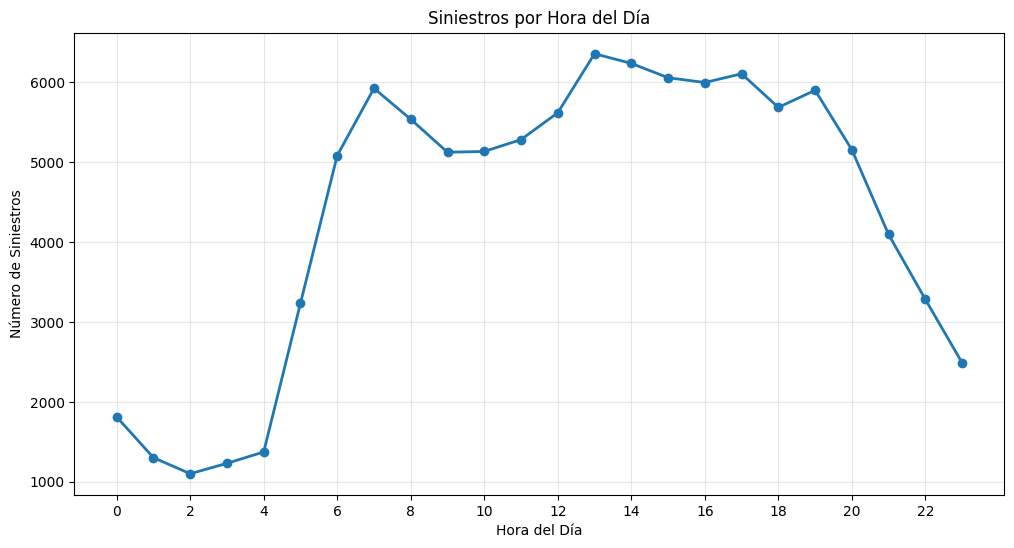


ESTADÍSTICAS PRINCIPALES:
Año con más siniestros: 2021 (28855 siniestros)
Mes con más siniestros: Marzo (9726 siniestros)
Día con más siniestros: viernes (16891 siniestros)
Hora con más siniestros: 13:00 (6355 siniestros)
Total de siniestros analizados: 105094

ANÁLISIS DE GRAVEDAD


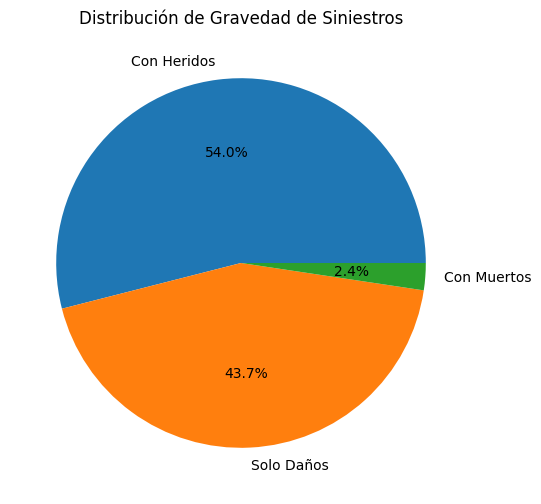

Con Heridos: 56728 siniestros (54.0%)
Solo Daños: 45879 siniestros (43.7%)
Con Muertos: 2487 siniestros (2.4%)

ANÁLISIS POR LOCALIDADES


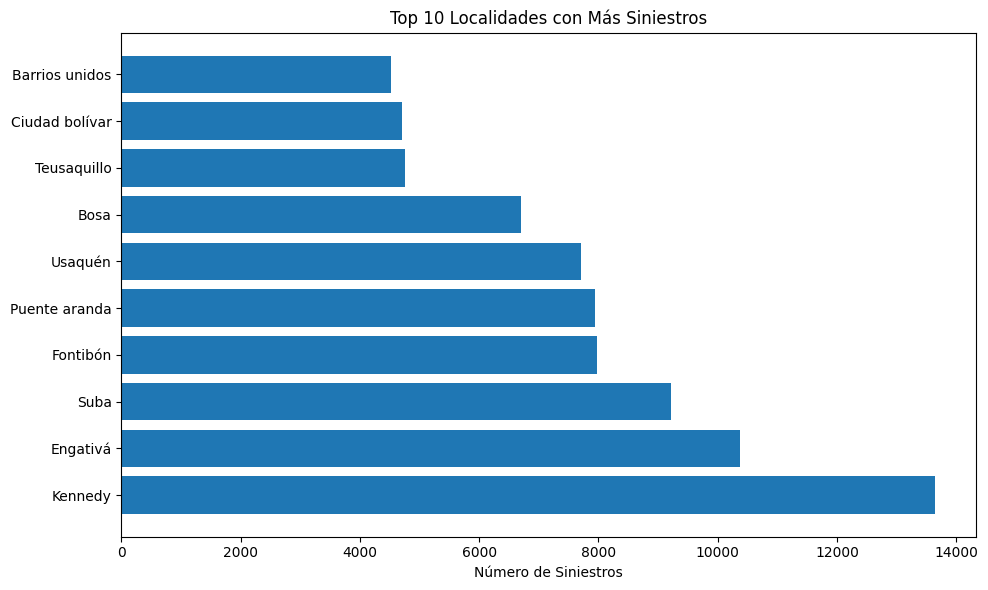

Top 5 localidades con más siniestros:
1. Kennedy: 13647 siniestros
2. Engativá: 10375 siniestros
3. Suba: 9221 siniestros
4. Fontibón: 7974 siniestros
5. Puente aranda: 7944 siniestros

RESUMEN EJECUTIVO:
Total de siniestros: 105094
Año con más siniestros: 2021
Mes con más siniestros: Marzo
Día con más siniestros: viernes
Hora con más siniestros: 13:00
Localidad con más siniestros: Kennedy
Tipo de gravedad más común: Con Heridos


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración simple
plt.style.use('default')

def analisis_temporal_simple(df_siniestros):
    """Análisis temporal básico para df_siniestros"""
    print("ANÁLISIS TEMPORAL DE SINIESTROS")
    print("=" * 40)
    
    # 1. GRÁFICO DE SINIESTROS POR AÑO
    plt.figure(figsize=(10, 6))
    siniestros_por_anio = df_siniestros['Año_Accidente'].value_counts().sort_index()
    plt.bar(siniestros_por_anio.index, siniestros_por_anio.values)
    plt.title('Siniestros por Año')
    plt.xlabel('Año')
    plt.ylabel('Número de Siniestros')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 2. GRÁFICO DE SINIESTROS POR MES
    plt.figure(figsize=(12, 6))
    meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    siniestros_por_mes = df_siniestros['Mes_Accidente'].value_counts()
    siniestros_por_mes = siniestros_por_mes.reindex(meses_orden)
    
    plt.bar(siniestros_por_mes.index, siniestros_por_mes.values)
    plt.title('Siniestros por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Número de Siniestros')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 3. GRÁFICO DE SINIESTROS POR DÍA DE LA SEMANA
    plt.figure(figsize=(10, 6))
    dias_orden = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
    siniestros_por_dia = df_siniestros['Día_Semana_Accidente'].value_counts()
    siniestros_por_dia = siniestros_por_dia.reindex(dias_orden)
    
    plt.bar(siniestros_por_dia.index, siniestros_por_dia.values)
    plt.title('Siniestros por Día de la Semana')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Número de Siniestros')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 4. GRÁFICO DE SINIESTROS POR HORA
    plt.figure(figsize=(12, 6))
    df_siniestros['Hora_Num'] = pd.to_numeric(df_siniestros['Hora_Accidente'], errors='coerce')
    siniestros_por_hora = df_siniestros['Hora_Num'].value_counts().sort_index()

    plt.plot(siniestros_por_hora.index, siniestros_por_hora.values, marker='o', linewidth=2)
    plt.title('Siniestros por Hora del Día')
    plt.xlabel('Hora del Día')
    plt.ylabel('Número de Siniestros')
    plt.xticks(range(0, 24, 2))
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # MOSTRAR ESTADÍSTICAS
    print("\nESTADÍSTICAS PRINCIPALES:")
    print("=" * 30)
    
    # Año con más siniestros
    anio_max = siniestros_por_anio.idxmax()
    cantidad_anio = siniestros_por_anio.max()
    print(f"Año con más siniestros: {anio_max} ({cantidad_anio} siniestros)")
    
    # Mes con más siniestros
    mes_max = siniestros_por_mes.idxmax()
    cantidad_mes = siniestros_por_mes.max()
    print(f"Mes con más siniestros: {mes_max} ({cantidad_mes} siniestros)")
    
    # Día con más siniestros
    dia_max = siniestros_por_dia.idxmax()
    cantidad_dia = siniestros_por_dia.max()
    print(f"Día con más siniestros: {dia_max} ({cantidad_dia} siniestros)")
    
    # Hora con más siniestros
    hora_max = siniestros_por_hora.idxmax()
    cantidad_hora = siniestros_por_hora.max()
    print(f"Hora con más siniestros: {hora_max}:00 ({cantidad_hora} siniestros)")
    
    # Total de siniestros
    print(f"Total de siniestros analizados: {len(df_siniestros)}")

def analisis_gravedad_simple(df_siniestros):
    """Análisis básico de gravedad"""
    print("\nANÁLISIS DE GRAVEDAD")
    print("=" * 30)
    
    # Gráfico de gravedad
    plt.figure(figsize=(8, 6))
    gravedad = df_siniestros['Gravedad_Indicador_Tradicional'].value_counts()
    plt.pie(gravedad.values, labels=gravedad.index, autopct='%1.1f%%')
    plt.title('Distribución de Gravedad de Siniestros')
    plt.show()
    
    # Estadísticas de gravedad
    for tipo, cantidad in gravedad.items():
        porcentaje = (cantidad / len(df_siniestros)) * 100
        print(f"{tipo}: {cantidad} siniestros ({porcentaje:.1f}%)")

def analisis_localidades_simple(df_siniestros):
    """Análisis básico por localidades"""
    print("\nANÁLISIS POR LOCALIDADES")
    print("=" * 30)
    
    # Top 10 localidades con más siniestros
    localidades = df_siniestros['Localidad'].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    plt.barh(localidades.index, localidades.values)
    plt.title('Top 10 Localidades con Más Siniestros')
    plt.xlabel('Número de Siniestros')
    plt.tight_layout()
    plt.show()
    
    print("Top 5 localidades con más siniestros:")
    for i, (localidad, cantidad) in enumerate(localidades.head().items(), 1):
        print(f"{i}. {localidad}: {cantidad} siniestros")

# EJECUTAR ANÁLISIS COMPLETO
print("INICIANDO ANÁLISIS DE SINIESTROS")
print("=" * 40)

# Ejecutar análisis temporal
analisis_temporal_simple(df_siniestros)

# Ejecutar análisis de gravedad
analisis_gravedad_simple(df_siniestros)

# Ejecutar análisis por localidades
analisis_localidades_simple(df_siniestros)


# Crear un resumen simple
resumen = {
    'Tipo de Análisis': [
        'Total de siniestros',
        'Año con más siniestros', 
        'Mes con más siniestros',
        'Día con más siniestros',
        'Hora con más siniestros',
        'Localidad con más siniestros',
        'Tipo de gravedad más común'
    ],
    'Resultado': [
        len(df_siniestros),
        df_siniestros['Año_Accidente'].value_counts().idxmax(),
        df_siniestros['Mes_Accidente'].value_counts().idxmax(),
        df_siniestros['Día_Semana_Accidente'].value_counts().idxmax(),
        f"{df_siniestros['Hora_Accidente'].value_counts().idxmax()}:00",
        df_siniestros['Localidad'].value_counts().idxmax(),
        df_siniestros['Gravedad_Indicador_Tradicional'].value_counts().idxmax()
    ]
}



# Mostrar el resumen en pantalla
print("\nRESUMEN EJECUTIVO:")
print("=" * 30)
for _, fila in df_resumen.iterrows():
    print(f"{fila['Tipo de Análisis']}: {fila['Resultado']}")